In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from gensim.models import Word2Vec, FastText


In [28]:
print("Loading GloVe embeddings...")

embeddings = {}

with open("glove.6B.100d.txt", encoding="utf8") as f:
    
    for line in f:
        
        values = line.split()
        
        word = values[0]
        
        vector = np.array(values[1:], dtype="float32")
        
        embeddings[word] = vector

print("Total words loaded:", len(embeddings))


Loading GloVe embeddings...
Total words loaded: 400000


In [29]:
similarity = cosine_similarity(
    [embeddings["king"]],
    [embeddings["queen"]]
)

print("Similarity between king and queen:",
      similarity[0][0])


Similarity between king and queen: 0.7507691


In [30]:
result = embeddings["king"] - embeddings["man"] + embeddings["woman"]

similarity = cosine_similarity(
    [result],
    [embeddings["queen"]]
)

print("king - man + woman similar to queen:",
      similarity[0][0])


king - man + woman similar to queen: 0.78344136


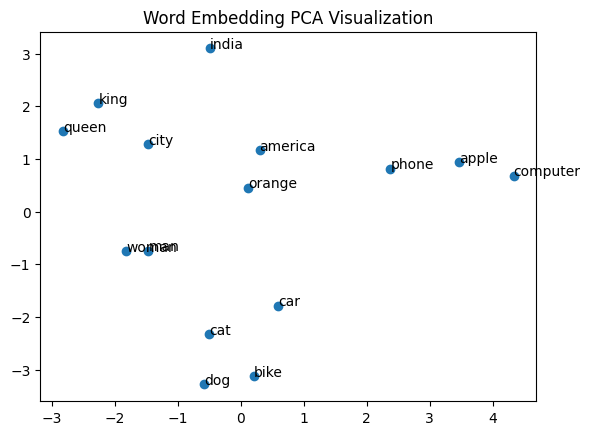

In [31]:
words = [
    "king", "queen", "man", "woman",
    "apple", "orange", "car", "bike",
    "dog", "cat", "computer", "phone",
    "india", "america", "city"
]

vectors = [embeddings[word] for word in words]

pca = PCA(n_components=2)

result = pca.fit_transform(vectors)

plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
    
    plt.annotate(word, (result[i, 0], result[i, 1]))

plt.title("Word Embedding PCA Visualization")

plt.show()


In [32]:
print("Comparison:")

print("GloVe similarity king-queen:",
      cosine_similarity([embeddings["king"]],
                        [embeddings["queen"]])[0][0])

print("Word2Vec similarity king-queen:",
      w2v.wv.similarity("king", "queen"))


Comparison:
GloVe similarity king-queen: 0.7507691
Word2Vec similarity king-queen: 0.044689216


In [33]:
sentences = [
    ["king", "queen", "man", "woman"],
    ["apple", "orange", "fruit"],
    ["car", "bike", "vehicle"]
]

w2v = Word2Vec(sentences, vector_size=100, min_count=1)

fast = FastText(sentences, vector_size=100, min_count=1)

print("Word2Vec similarity:",
      w2v.wv.similarity("king", "queen"))

print("FastText similarity:",
      fast.wv.similarity("king", "queen"))


Word2Vec similarity: 0.044689216
FastText similarity: -0.15943852


In [34]:
try:
    print(w2v.wv["kingdom"])
except:
    print("Word2Vec cannot handle unknown word")

print("FastText can handle unknown word:",
      fast.wv["kingdom"][:5])


Word2Vec cannot handle unknown word
FastText can handle unknown word: [ 0.00020514  0.00024369 -0.0013502  -0.00010541  0.0001405 ]


In [ ]:
glove_similarity = cosine_similarity(
    [embeddings["king"]],
    [embeddings["queen"]]
)[0][0]

word2vec_similarity = w2v.wv.similarity("king", "queen")

print("GloVe similarity (king-queen):", glove_similarity)
print("Word2Vec similarity (king-queen):", word2vec_similarity)



STEP 7: Compare GloVe vs Word2Vec
GloVe similarity (king-queen): 0.7507691
Word2Vec similarity (king-queen): 0.044689216
